# Entropy Examples: Time Series
A few examples showing how to calculate and interpret entropy of different time-series data

In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

#load imentropy package
import entropy

## Flat time series

In [2]:
#create a flat (single valued) time-series of length 256
x_flat = np.zeros((256,))
print(x_flat[:10]) #print first 10 values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
#Calculate Entropy
H_flat = entropy.entropy(x_flat)
print('Flat time series entropy = {} nats'.format(H_flat))

Flat time series entropy = -0.0 nats


## Time series of bits (0s and 1s)

In [4]:
#create a uniformly distributed time series of bits. 
#Important!: Make sure data is not in floating point form! 
x_ubits = np.random.uniform(low=0,high=2,size=(256,)).astype(int)
print(x_ubits[:10]) #print first 10 values

[1 1 1 1 1 1 0 1 0 0]


In [5]:
#calculate entropy
H_ubits = entropy.entropy(x_ubits)
print('Uniformly distributed bits time series entropy = {:.2f} nats'.format(H_ubits))

Uniformly distributed bits time series entropy = 0.69 nats


In [6]:
#We can also change units
H_ubits_inbits = entropy.entropy(x_ubits,units='bits')
print('Uniformly distributed bits time series entropy = {:.2f} bits'.format(H_ubits_inbits))

Uniformly distributed bits time series entropy = 1.00 bits


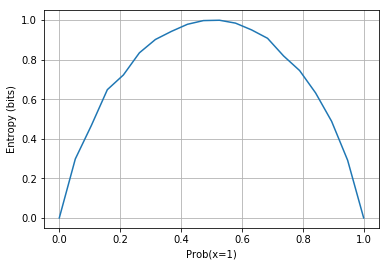

In [7]:
#lets see how entropy changes with the probability of a bit being = 1
P = np.linspace(0,1,20) #probabilities to test
H_bits = [] #place holder for entropys
for p in P:
    x = np.random.random((5000,)) #5000 random floats between 0 and 1
    #convert to bits, with Prob(x=1)=p
    x[x<p] = 0
    x[x>=p]= 1
    H_bits.append(entropy.entropy(x,units='bits'))
plt.plot(P,H_bits)
plt.xlabel('Prob(x=1)')
plt.ylabel('Entropy (bits)')
plt.grid()
plt.show()

#we can see that when a time series is more predictable, entropy is lower
#entropy is highest when a value is least predictable i.e. uniform random with p=0.5

## Time series of decimals (integers 0-9)

In [8]:
#create a uniformly distributed time series of decimals. 
#Important!: Make sure data is not in floating point form! 
x_udecs = np.random.uniform(low=0,high=10,size=(256,)).astype(int)
print(x_udecs[:20]) #print first 20 values

[1 3 3 4 7 7 3 1 3 0 7 2 3 0 1 3 3 1 5 7]


In [9]:
#calculate entropy
H_udecs = entropy.entropy(x_udecs)
print('Uniformly distributed decimals time series entropy = {:.2f} nats'.format(H_udecs))

Uniformly distributed decimals time series entropy = 2.29 nats


In [10]:
#We can also change units
H_udecs_indits = entropy.entropy(x_udecs,units='dits')
print('Uniformly distributed decimals time series entropy = {:.2f} dits'.format(H_udecs_indits))
#this should be 1 in theory, and very close to 1 in practice. 
#Try increasing the number of samples until consitently dits=1

Uniformly distributed decimals time series entropy = 1.00 dits


## Plot the three cases together

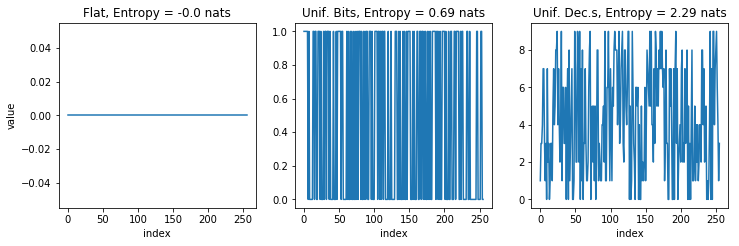

In [11]:
#Plot all time series together
f,ax = plt.subplots(1,3,figsize=(12,3.4))
ax[0].plot(x_flat)
ax[1].plot(x_ubits)
ax[2].plot(x_udecs)
ax[0].set_ylabel('value')
for axis in ax:
    axis.set_xlabel('index')
ax[0].set_title('Flat, Entropy = {} nats'.format(H_flat))
ax[1].set_title('Unif. Bits, Entropy = {:.2f} nats'.format(H_ubits))
ax[2].set_title('Unif. Dec.s, Entropy = {:.2f} nats'.format(H_udecs))
plt.show()